In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1:loading dataset
df=pd.read_csv("product_info.csv")
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [7]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [ ]:
#2:Dataset cleaning

cols_to_drop=['price_usd','variation_desc']
existing_cols=[col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols,inplace=True)

In [ ]:
#missing ratings&reviews
df['rating'] = (df['rating'].fillna(df['rating'] .median()))
df['reviews'] = df['reviews'].fillna(0)


In [47]:
#missing values
df['secondary_category'].fillna('unknown' ,inplace=True)
df['tertiary_category'].fillna('unknown' ,inplace=True)

In [48]:
#converting boolean values
bool_cols=['limited_edition','new','online_only','out_of_stock','sephora_exclusive']
df[bool_cols]=df[bool_cols].astype(bool)

In [ ]:
#3.Meaningful insights
# Average rating by brand
df.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10)

# Product count by category
df['primary_category'].value_counts()

# Correlation
df.corr(numeric_only=True)


,brand_id,loves_count,rating,reviews,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
brand_id,1.000000,-0.035604,-0.051293,-0.069571,0.204826,0.004533,0.027141,0.107290,-0.081976,0.124417,-0.096247,-0.199234,-0.217974
loves_count,-0.035604,1.000000,0.039019,0.685609,-0.102487,-0.069116,-0.076058,-0.163905,-0.053776,0.040512,0.408203,-0.104384,-0.139251
rating,-0.051293,0.039019,1.000000,0.067137,0.100797,-0.041245,0.100531,-0.017164,-0.043984,0.017957,0.002353,0.106781,0.109157
reviews,-0.069571,0.685609,0.067137,1.000000,-0.032883,-0.088411,-0.068654,-0.145589,-0.065314,-0.023933,0.288756,-0.043530,-0.123860
sale_price_usd,0.204826,-0.102487,0.100797,-0.032883,1.000000,0.153528,NaN,0.246329,-0.198436,-0.183794,-0.066505,0.794241,0.649473
limited_edition,0.004533,-0.069116,-0.041245,-0.088411,0.153528,1.000000,0.155662,0.061462,0.162170,0.066938,-0.062251,-0.005318,-0.003846
new,0.027141,-0.076058,0.100531,-0.068654,NaN,0.155662,1.000000,0.042553,0.014177,0.066984,-0.003873,-0.023746,0.005099
online_only,0.107290,-0.163905,-0.017164,-0.145589,0.246329,0.061462,0.042553,1.000000,0.002011,-0.100806,-0.091615,0.040024,0.069144
out_of_stock,-0.081976,-0.053776,-0.043984,-0.065314,-0.198436,0.162170,0.014177,0.002011,1.000000,0.025218,-0.053141,-0.037144,-0.036444
sephora_exclusive,0.124417,0.040512,0.017957,-0.023933,-0.183794,0.066938,0.066984,-0.100806,0.025218,1.000000,0.021568,-0.241908,-0.216606


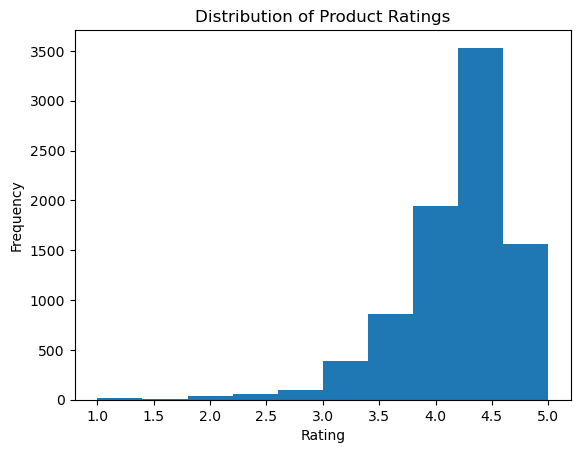

In [ ]:
#Visualization 1:
plt.hist(df['rating'])
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


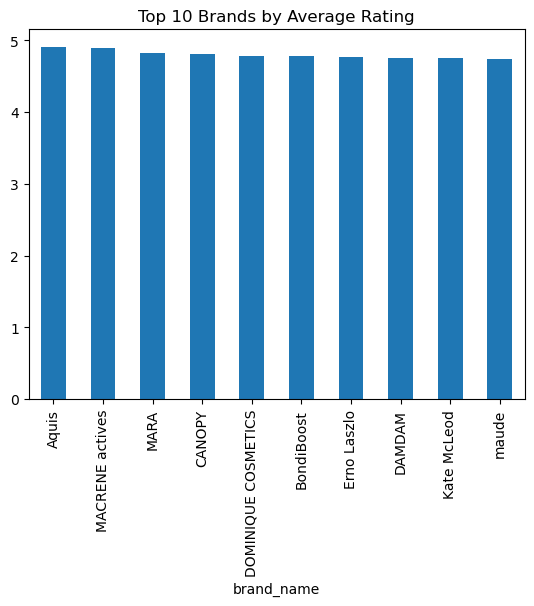

In [ ]:
#Visualization 2:
df.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Brands by Average Rating")
plt.show()


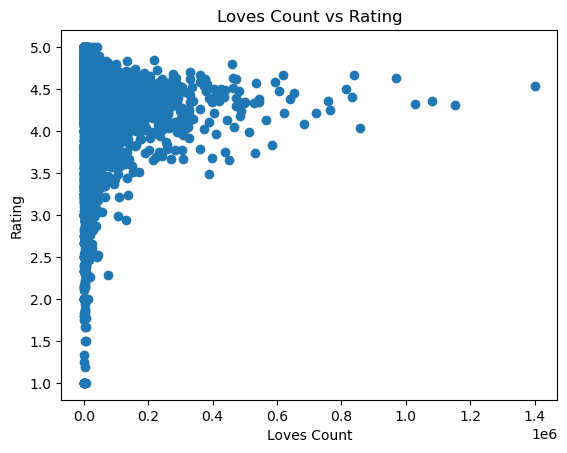

In [ ]:
#Visualization 3:
plt.scatter(df['loves_count'], df['rating'])
plt.xlabel("Loves Count")
plt.ylabel("Rating")
plt.title("Loves Count vs Rating")
plt.show()


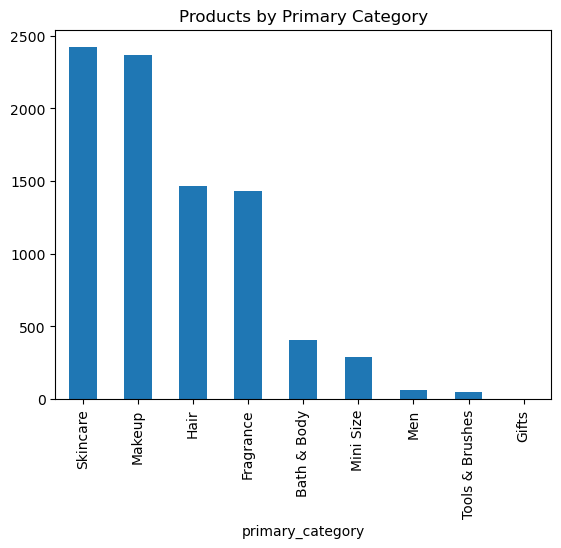

In [57]:
#Visualization 4:
df['primary_category'].value_counts().plot(kind='bar')
plt.title("Products by Primary Category")
plt.show()


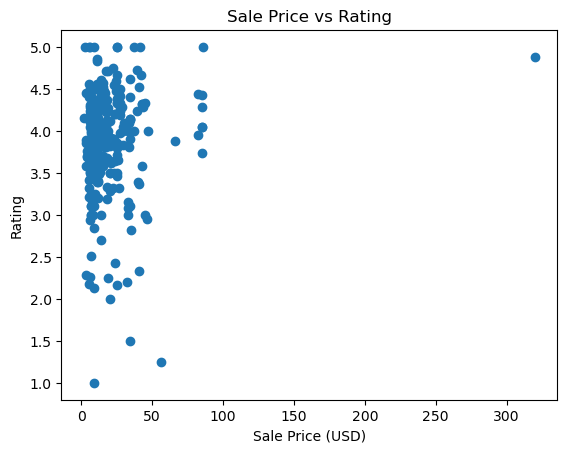

In [58]:
#Visualization 5:
plt.scatter(df['sale_price_usd'], df['rating'])
plt.xlabel("Sale Price (USD)")
plt.ylabel("Rating")
plt.title("Sale Price vs Rating")
plt.show()


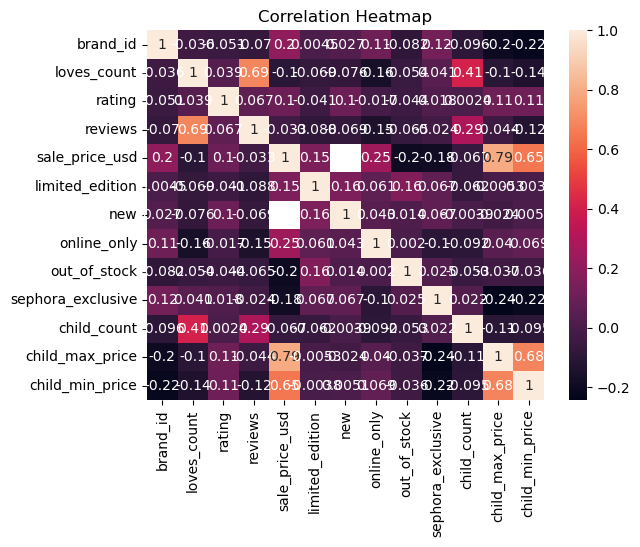

In [59]:
#Visualization 6:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


#Five Insights

Most products have ratings between 4 and 5, indicating high customer satisfaction.

Products with higher loves_count generally receive better ratings.

Skincare products dominate the primary category.

Sephora-exclusive products show slightly higher average ratings.

Product price does not strongly influence customer ratings.